# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("Dataset.csv")
#data.head()

# Exploring Data

In [2]:
df=pd.DataFrame(data)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
#checking datatype of each variable
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [4]:
#checking amount of missing data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
#amount of missing data
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

# Analysing Variables

Positive examples = 1189
Negative examples = 4771
Proportion of positive to negative examples = 24.92%


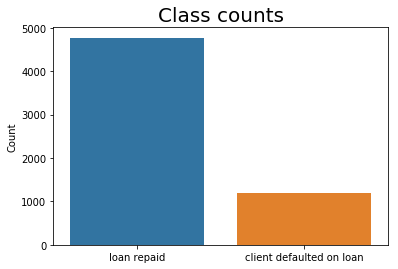

In [7]:
#checking imbalanced data
pos = df[df["BAD"] == 1].shape[0]
neg = df[df["BAD"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(6, 4))
sns.countplot(df["BAD"])
plt.xticks((0, 1), ["loan repaid", "client defaulted on loan"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [8]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [9]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [10]:
df['DEROG'].value_counts()


0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

Text(0,0.5,'Count')

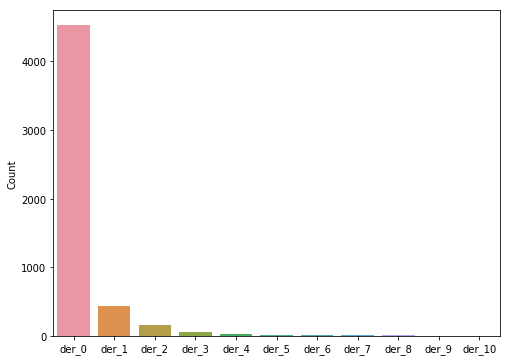

In [13]:
der_0 = df[df["DEROG"] == 0].shape[0]
der_1 = df[df["DEROG"] == 1].shape[0]
der_2 = df[df["DEROG"] == 2].shape[0]
der_3 = df[df["DEROG"] == 3].shape[0]
der_4 = df[df["DEROG"] == 4].shape[0]
der_5 = df[df["DEROG"] == 5].shape[0]
der_6 = df[df["DEROG"] == 6].shape[0]
der_7 = df[df["DEROG"] == 7].shape[0]
der_8 = df[df["DEROG"] == 8].shape[0]
der_9= df[df["DEROG"] == 9].shape[0]
der_10 = df[df["DEROG"] == 10].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(df["DEROG"])
plt.xticks((0, 1,2,3,4,5,6,7,8,9,10), ["der_0", "der_1","der_2","der_3","der_4","der_5","der_6","der_7","der_8","der_9","der_10"])
plt.xlabel("")
plt.ylabel("Count")
#plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [14]:
df['DELINQ'].value_counts() 

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

Text(0,0.5,'Count')

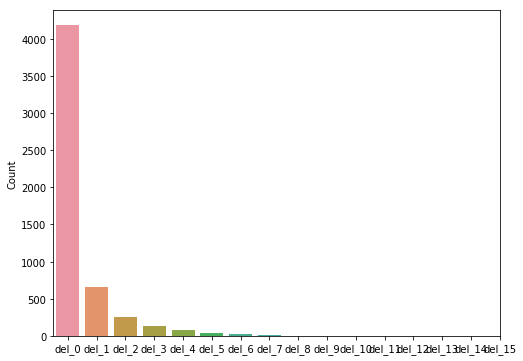

In [15]:
del_0 = df[df["DELINQ"] == 0].shape[0]
del_1 = df[df["DELINQ"] == 1].shape[0]
del_2 = df[df["DELINQ"] == 2].shape[0]
del_3 = df[df["DELINQ"] == 3].shape[0]
del_4 = df[df["DELINQ"] == 4].shape[0]
del_5 = df[df["DELINQ"] == 5].shape[0]
del_6 = df[df["DELINQ"] == 6].shape[0]
del_7 = df[df["DELINQ"] == 7].shape[0]
del_8 = df[df["DELINQ"] == 8].shape[0]
del_9 = df[df["DELINQ"] == 9].shape[0]
del_10 = df[df["DELINQ"] == 10].shape[0]
del_11= df[df["DELINQ"] == 11].shape[0]
del_12= df[df["DELINQ"] == 12].shape[0]
del_13= df[df["DELINQ"] == 13].shape[0]
del_14= df[df["DELINQ"] == 14].shape[0]
del_15= df[df["DELINQ"] == 15].shape[0]

plt.figure(figsize=(8,6))
sns.countplot(df["DELINQ"])
plt.xticks((0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15), ["del_0", "del_1","del_2","del_3","del_4","del_5","del_6","del_7","del_8",
                                                      "del_9","del_10","del_11","del_12","del_13","del_14","del_15"])
plt.xlabel("")
plt.ylabel("Count")
#plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [16]:
df['NINQ'].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

Text(0,0.5,'Count')

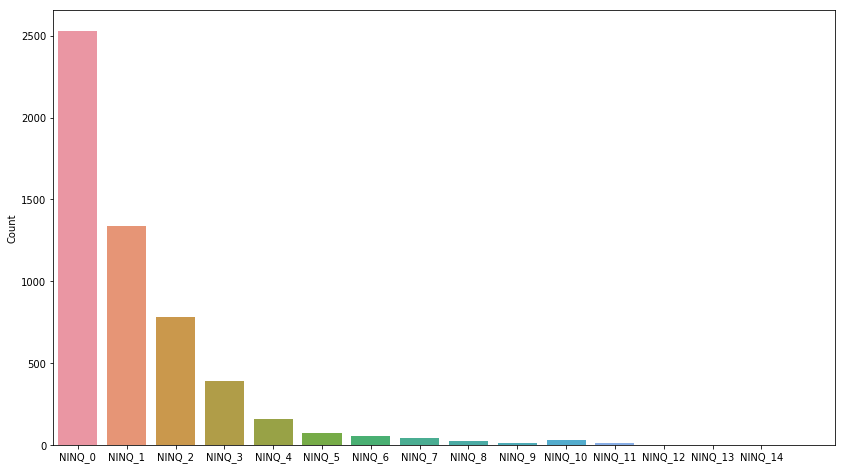

In [17]:
NINQ_0 = df[df["NINQ"] == 0].shape[0]
NINQ_1 = df[df["NINQ"] == 1].shape[0]
NINQ_2 = df[df["NINQ"] == 2].shape[0]
NINQ_3 = df[df["NINQ"] == 3].shape[0]
NINQ_4 = df[df["NINQ"] == 4].shape[0]
NINQ_5 = df[df["NINQ"] == 5].shape[0]
NINQ_6 = df[df["NINQ"] == 6].shape[0]
NINQ_7 = df[df["NINQ"] == 7].shape[0]
NINQ_8 = df[df["NINQ"] == 8].shape[0]
NINQ_9 = df[df["NINQ"] == 9].shape[0]
NINQ_10 = df[df["NINQ"] == 10].shape[0]
NINQ_11= df[df["NINQ"] == 11].shape[0]
NINQ_12= df[df["NINQ"] == 12].shape[0]
NINQ_13= df[df["NINQ"] == 13].shape[0]
NINQ_14= df[df["NINQ"] == 14].shape[0]


plt.figure(figsize=(14,8))
sns.countplot(df["NINQ"])
plt.xticks((0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14), ["NINQ_0", "NINQ_1","NINQ_2","NINQ_3","NINQ_4","NINQ_5","NINQ_6","NINQ_7",
                                                   "NINQ_8","NINQ_9","NINQ_10","NINQ_11","NINQ_12","NINQ_13","NINQ_14"])
plt.xlabel("")
plt.ylabel("Count")


In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [19]:
#drop df['DEROG'] and df['DELINQ'] column  
# Containing large amount of one value or having less varinace

df.drop(['DELINQ','DEROG'],axis=1,inplace=True)

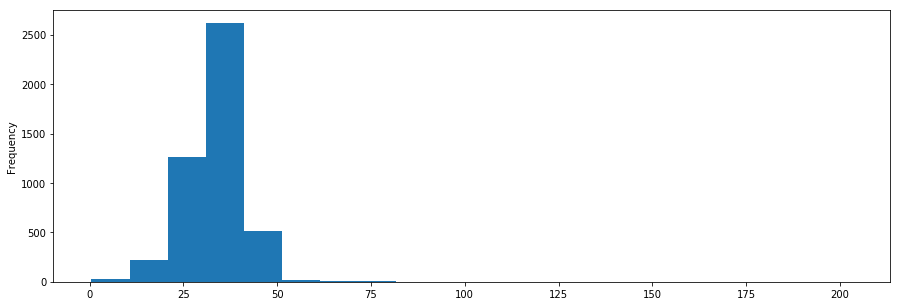

In [20]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))

# Outlier Detection and Removal

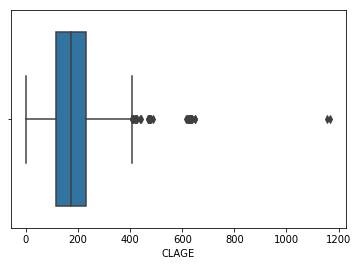

In [21]:
sns.boxplot(x=df['CLAGE'])

In [22]:
#outliers
df.loc[df['CLAGE'] >650 ]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,CLAGE,NINQ,CLNO,DEBTINC
3097,1,16800,87300.0,155500.0,DebtCon,Other,3.0,1154.633333,0.0,0.0,NaN
3679,1,19300,96454.0,157809.0,DebtCon,Other,3.0,1168.233561,0.0,0.0,40.206138


In [23]:
df = df[~(df['CLAGE'] >=650)]   #Removing Outliers

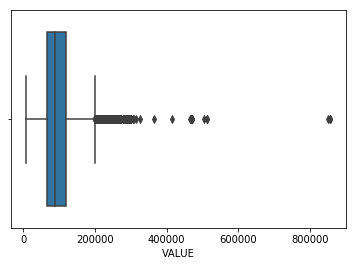

In [24]:
sns.boxplot(x=df['VALUE'])

In [25]:
df.loc[df['VALUE']>600000]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,CLAGE,NINQ,CLNO,DEBTINC
5665,1,40000,NaN,850000.0,HomeImp,Other,17.0,186.666667,1.0,24.0,NaN
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,180.608878,0.0,23.0,42.071645
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,189.099378,1.0,23.0,43.258779
5752,1,43500,NaN,855909.0,HomeImp,Other,16.0,196.403636,0.0,23.0,42.985408


In [26]:
df = df[~(df['VALUE'] >=600000)] 

In [27]:
df.shape

(5954, 11)

In [28]:
#converting categorial variables to dummy variables
df=pd.get_dummies(df)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,94.366667,1.0,9.0,NaN,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,121.833333,0.0,14.0,NaN,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,149.466667,1.0,10.0,NaN,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,93.333333,0.0,14.0,NaN,0,1,0,1,0,0,0,0


# Imputation

In [29]:
#imputation by mean
df['MORTDUE']=df['MORTDUE'].fillna(df['MORTDUE'].mean())
df['VALUE']=df['VALUE'].fillna(df['VALUE'].mean())  
df['YOJ']=df['YOJ'].fillna(df['YOJ'].mean())
df['CLAGE']=df['CLAGE'].fillna(df['CLAGE'].mean())
df['CLNO']=df['CLNO'].fillna(df['CLNO'].mean())


df['NINQ']=df['NINQ'].fillna(df['NINQ'].mean())
df['DEBTINC']=df['DEBTINC'].fillna(df['DEBTINC'].mean())


# Splitting Data into Train and Test Data

In [30]:
X=df.drop('BAD',axis=1)
y=df['BAD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(3989, 16) (3989,) (1965, 16) (1965,)


# Oversampling

In [32]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=12,ratio=0.25)
X_train_res,y_train_res=sm.fit_sample(X_train,y_train)

# Variable Transfromation

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


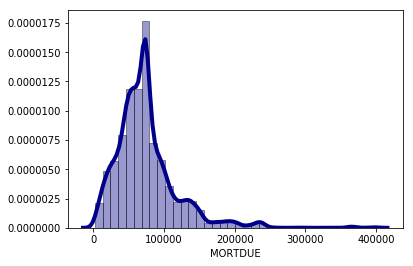

In [33]:
sns.distplot(df['MORTDUE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



In [34]:
from scipy.stats import skew
skew(df['MORTDUE'])

1.898019118844069

In [35]:
print(df['MORTDUE'].mean(),df['MORTDUE'].median())

73754.1568382353 69440.5


In [36]:
df['MORTDUE'] = np.log(df['MORTDUE'])

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


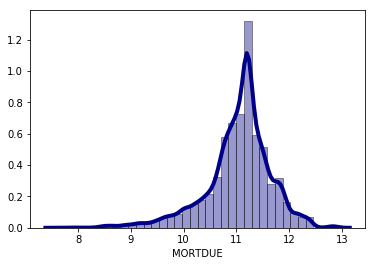

In [37]:
sns.distplot(df['MORTDUE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [38]:
from scipy.stats import skew
skew(df['MORTDUE'])

-0.9459636221922183

In [39]:
print(df['MORTDUE'].mean(),df['MORTDUE'].median())

11.043381076014246 11.148225546632462


c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


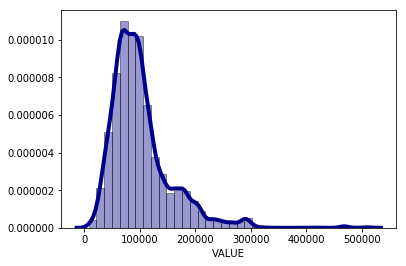

In [40]:
sns.distplot(df['VALUE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [41]:
skew(df['VALUE'])

1.8737602372876139

In [42]:
df['VALUE']=np.log(df['VALUE'])

In [43]:
print(df['VALUE'].mean(),df['VALUE'].median())

11.404080567265623 11.407248231245468


In [44]:
skew(df['VALUE'])

-0.14486338560256565

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


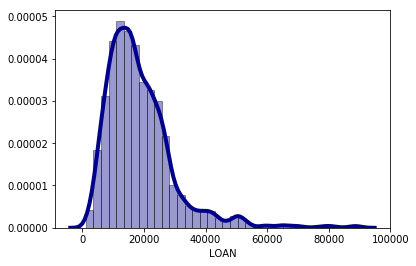

In [45]:
sns.distplot(df['LOAN'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [46]:
skew(df['LOAN'])

2.0291399376696133

In [47]:
df['LOAN']=np.log(df['LOAN'])

In [48]:
print(df['LOAN'].mean(),df['LOAN'].median())

9.671056050182615 9.698920386794853


In [49]:
skew(df['LOAN'])

-0.29893401047813034

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


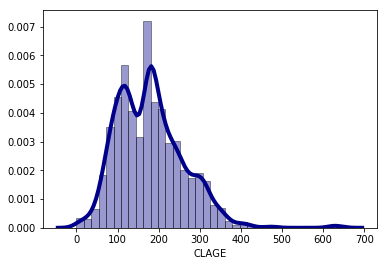

In [50]:
sns.distplot(df['CLAGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [51]:
skew(df['CLAGE'])

0.9090492248048219

In [52]:
#applyting square root transformation since it has 0 value and log transformation will give nan skew.
df['CLAGE']=np.sqrt(df['CLAGE'])

In [53]:
skew(df['CLAGE'])

0.007674730455636831

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


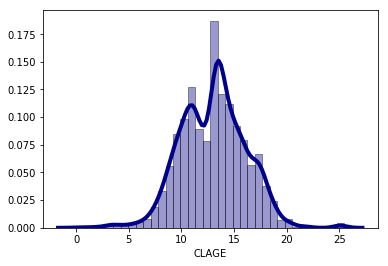

In [54]:
sns.distplot(df['CLAGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


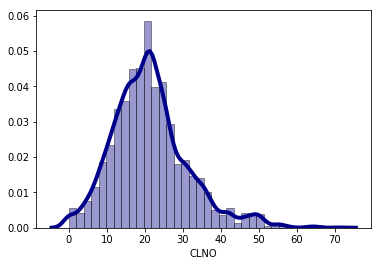

In [55]:
sns.distplot(df['CLNO'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [56]:
skew(df['YOJ'])

1.0357132899999508

In [57]:
#apply sqrt transform
df['YOJ']=np.sqrt(df['YOJ'])
skew(df['YOJ'])

-0.11874162727776182

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


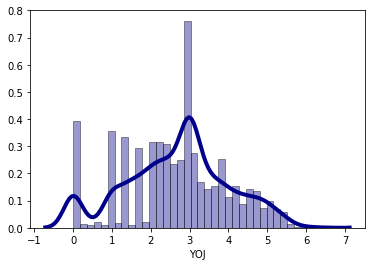

In [58]:
sns.distplot(df['YOJ'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [59]:
skew(df['YOJ'])

-0.11874162727776182

# Variable selection

In [60]:
#variable selction

In [61]:
df.isnull().sum()

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

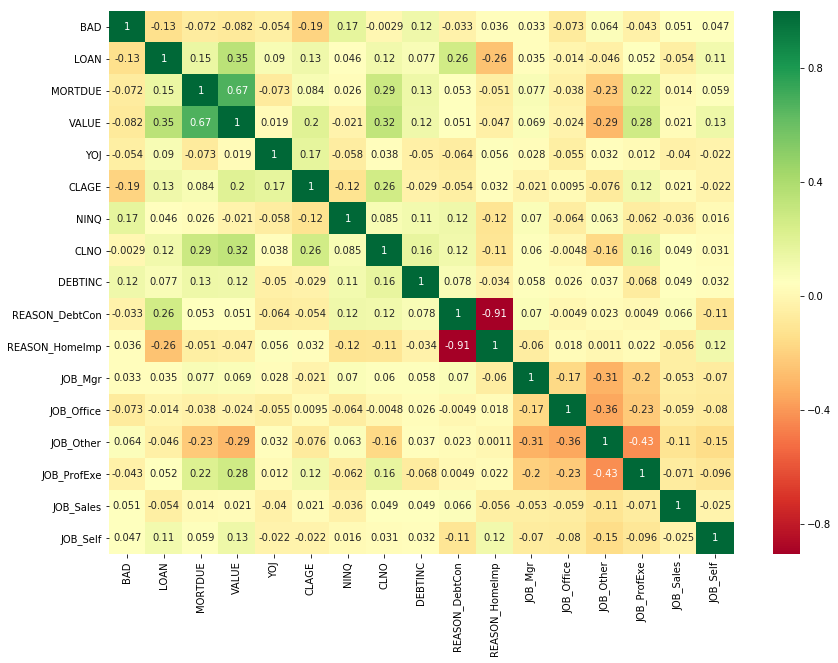

In [63]:
#correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [64]:
#none of the variables having correlation greater than 0.9
#no need to drop any variable

# MODELING

In [65]:
from sklearn.metrics import f1_score,classification_report,precision_score ,recall_score,accuracy_score 

In [71]:

from sklearn.linear_model import LogisticRegression
#change the lamda 
model_lasso = LogisticRegression(penalty="l1")
model_lasso.fit(X_train_res,y_train_res)

#thetaLasso=model_lasso.coef_
#print("The regularized theta using lasso regression:\n",thetaLasso.reshape(16,1))

c:\users\w10\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred=model_lasso.predict(X_test)
y_test=np.array(y_test).reshape(1965,1)
y_pred.shape
print("f1_score  ",f1_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))

f1_score   0.12043010752688171
precision_score 0.5384615384615384
recall_score 0.06779661016949153


In [73]:
#f1 score is too less

In [74]:
#TRY fitting DECISION Tree

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 100

dectree_basic.fit(X_train_res,y_train_res)

y_pre = dectree_basic.predict(X_test)
y_test=np.array(y_test).reshape(1965,1)
y_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
print("f1_score  ",f1_score(y_test,y_pre))
print("precision_score",precision_score(y_test,y_pre))
print("recall_score",recall_score(y_test,y_pre))

f1_score   0.6353240152477764
precision_score 0.6684491978609626
recall_score 0.6053268765133172


In [78]:
#try fitting Xgboost since it is ensembling method 


In [86]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,
                     scale_pos_weight=1,seed=27)
xgb1.fit(X_train, y_train)
yp=xgb1.predict(X_test)

#f1_score(y_test,yp)
print("f1_score  ",f1_score(y_test,yp))
print("precision_score",precision_score(y_test,yp))
print("recall_score",recall_score(y_test,yp))

f1_score   0.7174770039421814
precision_score 0.7844827586206896
recall_score 0.6610169491525424


In [87]:
#change the maximum depth to 7(Hyperparameter tuning)

In [85]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=7,min_child_weight=1,gamma=0,
                     scale_pos_weight=1,seed=27)
xgb1.fit(X_train, y_train)
yp=xgb1.predict(X_test)

f1_score(y_test,yp)
print("f1_score  ",f1_score(y_test,yp))
print("precision_score",precision_score(y_test,yp))
print("recall_score",recall_score(y_test,yp))

f1_score   0.7441253263707571
precision_score 0.8073654390934845
recall_score 0.6900726392251816


In [88]:
Predicted_probability=xgb1.predict_proba(X_test)
print(Predicted_probability)

array([[9.9922860e-01, 7.7142409e-04],
       [9.9857241e-01, 1.4275998e-03],
       [9.3645746e-01, 6.3542560e-02],
       ...,
       [3.6606389e-01, 6.3393611e-01],
       [8.9706904e-01, 1.0293098e-01],
       [9.9898922e-01, 1.0107977e-03]], dtype=float32)

In [92]:
#taking the 0th column of Predicted_probability
prediction = pd.DataFrame(Predicted_probability[:,0], columns=['Predicted_probability']).to_csv('prediction.csv')